In [55]:
#!pip install mediapipe 
#!pip install opencv-contrib-python
# ! pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for imutils: started
  Running setup.py install for imutils: finished with status 'done'


  DEPRECATION: imutils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [45]:
print (cv2.__version__)

4.9.0


In [46]:
imagePath = './imgs/random.jpg'

Image shape: (339, 509, 3)


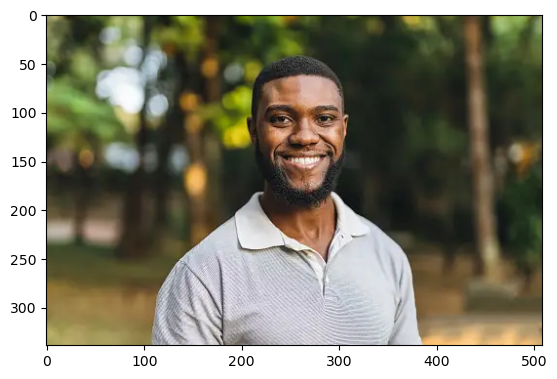

In [47]:
img = cv2.imread(imagePath)

print("Image shape:", img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')  
plt.show()

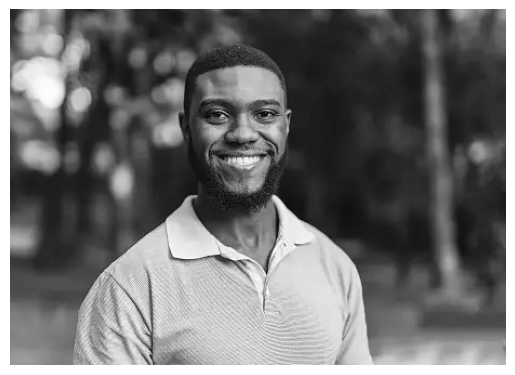

In [48]:
# set dimension for cropping image
x, y, width, depth = 50, 10, 950, 500
image_cropped = img[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

Faces:
 [[161  52 109 109]]


Text(0.5, 1.0, 'Face Detection')

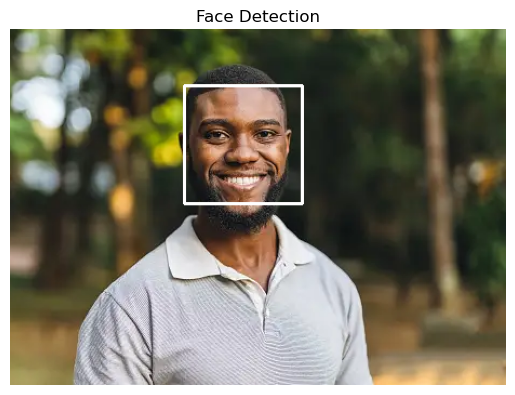

In [49]:
haarcascade = "./haarcascade_frontalface_default.xml"

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow( cv2.cvtColor(image_template, cv2.COLOR_BGR2RGB))
plt.title('Face Detection')

In [56]:
LBFmodel = "./lbfmodel.yaml"

# Create an instance of the Facial landmark Detector with the model
landmark_detector = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

# Create a copy of the original image to draw landmarks on
image_template = image_cropped.copy()

# Draw landmarks on "image_template"
for landmark in landmarks:
    for x, y in landmark[0]:
        # display landmarks on "image_template"
        # with white color in BGR and thickness 1
        cv2.circle(image_template, (int(x), int(y)), 1, (255, 255, 255), 1)

# Display the image with landmarks
plt.axis("off")
plt.imshow(image_template)
plt.show()


AttributeError: module 'cv2' has no attribute 'face'